Copyright (c) 2019 Computational-Medicine

# Multiparametric MRI - Unsupervised classification

## An initial  example illustrating k-means clustering

Adapted from: http://www.bigendiandata.com/2017-04-18-Jupyter_Customer360/  (Ian Downard)

## What is K-Means?

[k-means clustering](https://en.wikipedia.org/wiki/Cluster_analysis) aims to group a set of objects in such a way that objects in the same group (or cluster) are more similar to each other than to those in other groups (clusters). It operates on a table of values where every cell is a number. K-Means only supports numeric columns. In Spark those tables are usually expressed as a dataframe. A dataframe with two columns can be easily visualized on a graph where the x-axis is the first column and the y-axis is the second column. 

**For example, here’s a 2 dimensional graph for a dataframe with two columns**

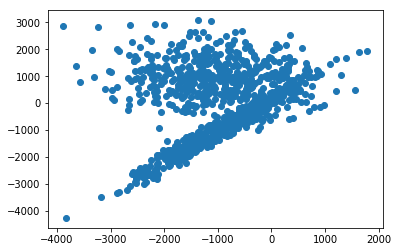

In [1]:
from IPython.display import Image
Image(filename='./assets/scatter-2d.png', width=500)

**If you were to manually group the data in the above graph, how would you do it? You might draw two circles, like this:**

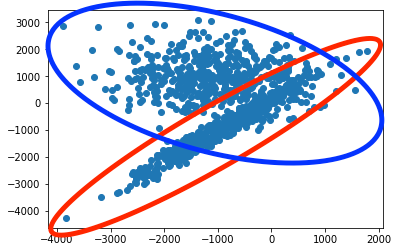

In [2]:
Image(filename='./assets/scatter-2d-circled.png', width=500)

**And in this case that is pretty close to what you get through k-means. The following figure shows how the data is segmented by running k-means on our two dimensional dataset.**

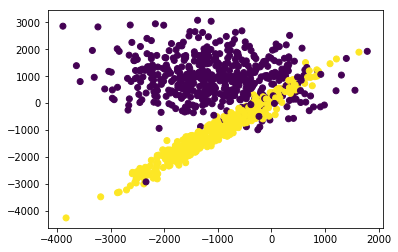

In [3]:
Image(filename='./assets/scatter-2d-segments.png', width=500)

### A real k-means example using synthetic data

(modified from the "Python Data Science Handbook" by Jake VanderPlas)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

Plot the input data

In [12]:
# common plot formatting for below
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='gray')
    ax.set_ylabel('feature 2', color='gray')
    ax.set_title(title, color='gray')

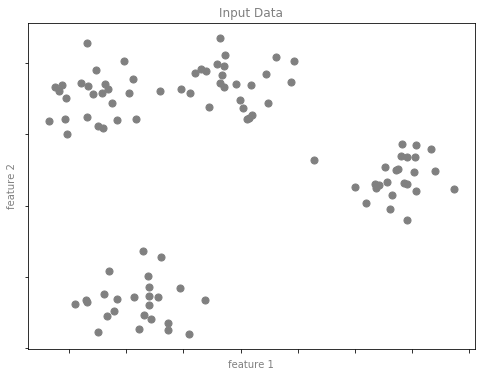

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Input Data')

plt.show()
# fig.savefig('assets/k-means-clustering-1.png')

Plot the data with cluster labels

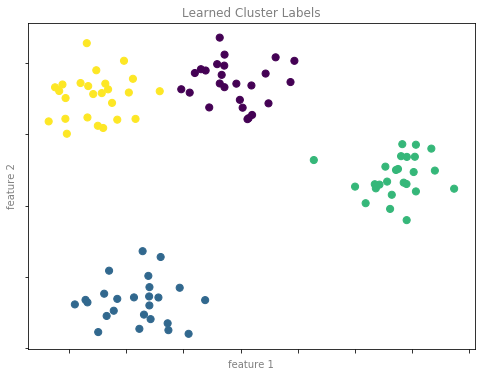

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')

# format the plot
format_plot(ax, 'Learned Cluster Labels')

plt.show()
# fig.savefig('assets/k-means-clustering-2.png')

### Visualizing K-Means clusters in 3D

The above plots were created by clustering two feature columns. There could have been other columns in our data set, but we just used two columns. If we want to use an additional column as a clustering feature we would want to visualize the cluster over three dimensions. Here’s an example that shows how to visualize cluster shapes with a 3D scatter/mesh plot in a Jupyter notebook using [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) to generate data:

In [4]:
# Initialize plotting library and functions for 3D scatter plots 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

def rename_columns(df, prefix='x'):
    """
    Rename the columns of a dataframe to have X in front of them

    :param df: data frame we're operating on
    :param prefix: the prefix string
    """
    df = df.copy()
    df.columns = [prefix + str(i) for i in df.columns]
    return df

In [5]:
# Create an artificial dataset with 3 clusters for 3 feature columns
X, Y = make_classification(n_samples=100, n_classes=3, n_features=3, n_redundant=0, n_informative=3,
                             scale=1000, n_clusters_per_class=1)
df = pd.DataFrame(X)
# rename X columns
df = rename_columns(df)
# and add the Y
df['y'] = Y
df.head(3)

x0           x1           x2  y
0  390.848292  -203.361246  -162.092773  1
1 -474.542489  -427.569333 -1615.940176  0
2 -502.272156  1772.553029 -1364.502727  2

In [9]:
# Visualize cluster shapes in 3d.

cluster1=df.loc[df['y'] == 0]
cluster2=df.loc[df['y'] == 1]
cluster3=df.loc[df['y'] == 2]

scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2],
    marker = dict( size=2, color='red')
)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2],
    color='red', showscale = True
)
layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3, cluster1, cluster2, cluster3], layout=layout )
# Use py.iplot() for IPython notebook
plotly.offline.iplot(fig, filename='mesh3d_sample')

You can interact with that 3D graph with click-drag or mouse wheel to zoom.

### Visualizing K-Means Clusters in N Dimensions

What if you’re clustering over more than 3 columns? How do you visualize that? One common approach is to split the 4th dimension data into groups and plot a 3D graph for each of those groups. Another approach is to split all the data into groups based on the k-means cluster value, then apply an aggregation function such as sum or average to all the dimensions in that group, then plot those aggregate values in a heatmap. This approach is described in the following:

We produce an artificial dataset with 12 feature columns to simulate a dataset in which each each experimental unit (data point) have been characterized by a variety of attributes, such as different measurements. By plotting the k-means cluster groups and feature columns in a heatmap we can illustrate how we can use machine learning to categorize such a dataset into groups. This in order to obtain better insight to complex data without any prior model of the data generating mechanisms.

In [10]:
#Initializes plotting library and functions for 3D scatter plots 
#from pyspark.ml.feature import VectorAssembler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

def rename_columns(df, prefix='x'):
    """
    Rename the columns of a dataframe to have X in front of them

    :param df: data frame we're operating on
    :param prefix: the prefix string
    """
    df = df.copy()
    df.columns = [prefix + str(i) for i in df.columns]
    return df

In [15]:
# create an artificial dataset with 3 clusters
X, Y = make_classification(n_samples=100, n_classes=4, n_features=12, n_redundant=0, n_informative=12,
                             scale=1000, n_clusters_per_class=1)
df = pd.DataFrame(X)
# ensure all values are positive (this is needed for our medical example)
df = df.abs()
# rename X columns
df = rename_columns(df)
# and add the Y
df['y'] = Y

# split df into cluster groups
grouped = df.groupby(['y'], sort=True)

# compute sums for every column in every group
sums = grouped.sum()
sums

x0            x1            x2            x3            x4  \
y                                                                         
0  36377.818750  40630.799800  28133.740193  50939.250700  55623.857821   
1  43850.242235  49724.336454  43658.995790  46506.149938  52944.096884   
2  33207.905220  61750.542118  46329.641146  55103.528342  52576.118732   
3  48710.390046  37514.862932  54799.011907  40829.250288  38538.996117   

             x5            x6            x7            x8            x9  \
y                                                                         
0  45090.228508  39891.295307  43689.684565  36755.220658  44461.003433   
1  38220.226119  47693.168080  51085.819245  42699.666589  50090.467727   
2  45595.266297  47007.938747  51242.566623  48794.840143  41587.920952   
3  44396.473899  41221.719713  45068.099667  40305.510195  35697.031446   

            x10           x11  
y                              
0  37329.799342  52889.695163  
1  39003.944419  55691.157474  
2  36832.383711  49877.301168  
3  46194.705796  40769.224026

In [14]:
data = [go.Heatmap( z=sums.values.tolist(), 
                   y=['Subject A', 'Subject B', 'Subject C', 'Subject D'],
                   x=['Alanine aminotransferase (ALAT)',
                      'Albumin',
                      'Amylase (pancreatic)',
                      'Aspartate aminotransferase (ASAT)',
                      'Calcium',
                      'Cholesterol',
                      'Creatin Kinase (CK)',
                      'Chloride',
                      'C-reactive protein (CRP)',
                      'Creatinine',
                      'Iron',
                      'Glucose',
                      'Potassium',
                      'Lactate dehydrogenase'
                     ],
                   colorscale='Viridis')]

plotly.offline.iplot(data, filename='pandas-heatmap')

**For more advanced examples using k-means clustering, see:**<br>
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

## Unsupervised classification (k-means) on multispectral MRI data

**DATA**

We will be using a four-channel multispectral image (slice 60 from a multispectral 3D recording),  <br>
reported in  Lundervold et al. Volume distribution of cerebrospinal fluid using multispectral MR
imaging. <br> _Medical Image Analysis_ 2000;4:123-136. https://www.ncbi.nlm.nih.gov/pubmed/10972326, [[PDF](https://drive.google.com/file/d/17Ut1ScHU4cX5x_EHwQnNwH_q3Lgcq5WA/view)]<br>
and a manually delineated `brain ROI mask` for spatial restriction of the unsupervised pixel classification

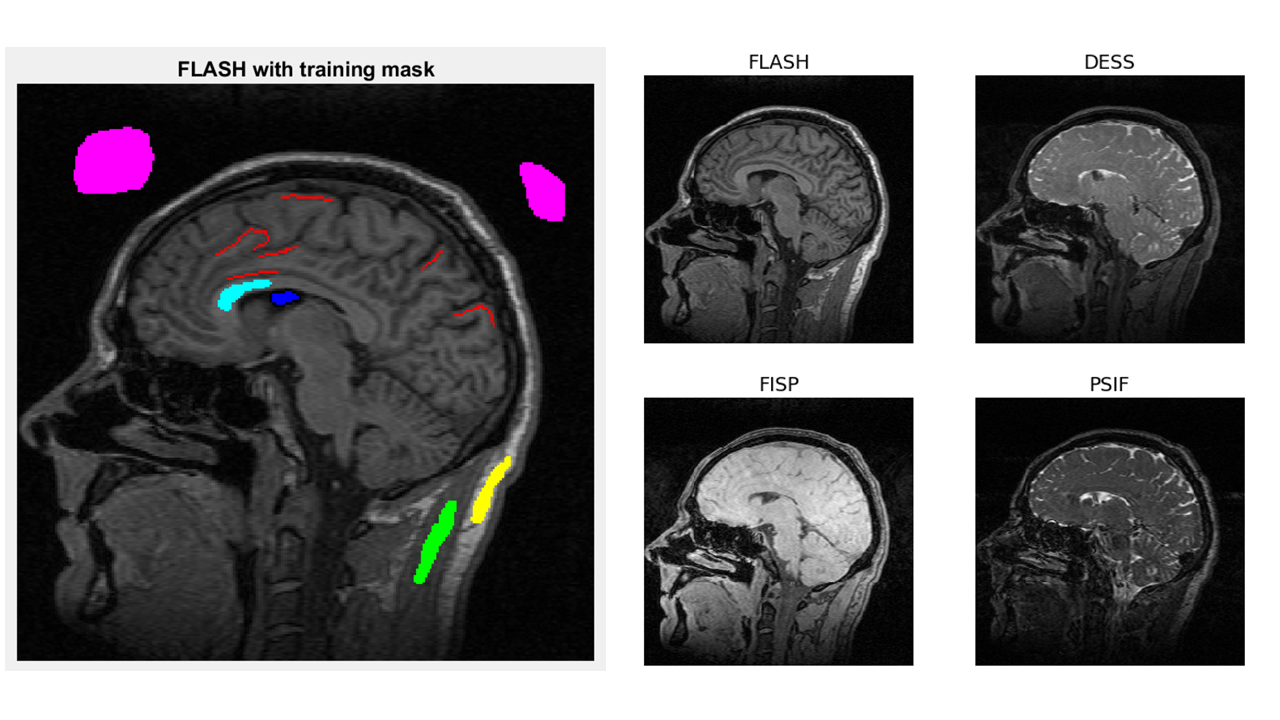

In [40]:
from IPython.display import Image
Image(filename='./assets/multispectral_tissue_classification_pptx.png', width=600)

**Import libraries to be used**

In [41]:
%matplotlib inline
# This to be able to display figures and graphs within the notebook browser

import os
import os.path as op
import pathlib
import glob
import shutil
import warnings
import numpy as np
import pandas as pd
import nibabel as nib
import scipy
import cv2
from nilearn import image
from nilearn import plotting
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn.image.image import mean_img
from sklearn.cluster import KMeans
from nilearn.masking import apply_mask
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
import IPython

home = os.path.expanduser('~')  # To make path to local home directory

**Define directory with the data, channel names (MRI pulse sequence acronyms), and class names (tissue types) being involved**

In [42]:
mydata = '../testdata'
chn_names = ['FLASH', 'DESS', 'FISP', 'PSIF']
class_names = ['air', 'gm', 'wm', 'csf', 'mus', 'fat']

## Read the multispectral MR image, multi-class training mask, and binary ROI mask

In [43]:
# Using nibabel to read the multispectral image (and the training mask)
fn_multispectral = '../data/mri/multispectral_mri.nii.gz'
img = nib.load(fn_multispectral)
fn_tmsk = '../data/mri/training_mask_1_6.nii.gz'
tmsk = nib.load(fn_tmsk)
fn_roimsk = '../data/mri/brain_roi_mask.nii.gz'
roimsk = nib.load(fn_roimsk)

**Print properties of the multispectral NIFTI image**

In [44]:
print('**Multispectral image info:**')
print('shape of image = ', img.header.get_data_shape())
print('units = ', img.header.get_xyzt_units())
print('voxel size = ', img.header.get_zooms())
print('dtype = %s' % img.header.get_data_dtype())
data = img.get_data()
print('min = %.1f' % data.min())
print('max = %.1f' % data.max())
print('number of channels =', img.shape[-1])
# Collaps the singular (z-)dimension
img_data = np.uint16(data.squeeze())
print('shape of 2D+spectral img_data = ',img_data.shape)
print('dtype of 2D+spectral img_data = ',img_data.dtype)
print('img affine:', img.affine)

**Multispectral image info:**
shape of image =  (256, 256, 1, 4)
units =  ('unknown', 'unknown')
voxel size =  (1.0, 1.0, 1.4, 1.0)
dtype = float64
min = 0.0
max = 493.0
number of channels = 4
shape of 2D+spectral img_data =  (256, 256, 4)
dtype of 2D+spectral img_data =  uint16
img affine: [[   0.            0.            1.39999998    0.        ]
 [   1.            0.           -0.          256.        ]
 [   0.            1.            0.         -511.        ]
 [   0.            0.            0.            1.        ]]


**and corresponing training mask**

In [45]:
print('**Training mask info:**')
print('shape = ', tmsk.header.get_data_shape())
print('voxel size = ', tmsk.header.get_zooms())
print('dtype tmsk = %s' % tmsk.header.get_data_dtype())
tmsk_data = tmsk.get_data().squeeze()
print('min mask value = %.0f' % tmsk_data .min())
print('max mask value = %.0f' % tmsk_data .max())
print('shape of 2D tmsk_data = ', tmsk_data.shape)
print('tmsk affine:', tmsk.affine)

**Training mask info:**
shape =  (256, 256, 1, 1)
voxel size =  (1.0, 1.0, 1.4, 1.0)
dtype tmsk = int16
min mask value = 0
max mask value = 6
shape of 2D tmsk_data =  (256, 256)
tmsk affine: [[   0.            0.            1.39999998    0.        ]
 [   1.            0.           -0.          256.        ]
 [   0.            1.            0.         -511.        ]
 [   0.            0.            0.            1.        ]]


**and the ROI mask**

In [46]:
print('**Brain ROI mask info:**')
print('shape = ', roimsk.header.get_data_shape())
print('voxel size = ', roimsk.header.get_zooms())
print('dtype roimsk = %s' % roimsk.header.get_data_dtype())
roimsk_data = roimsk.get_data().squeeze()
print('min mask value = %.0f' % roimsk_data .min())
print('max mask value = %.0f' % roimsk_data .max())
print('shape of 2D roimsk_data = ', roimsk_data.shape)
print('roimsk affine:', roimsk.affine)

**Brain ROI mask info:**
shape =  (256, 256, 1, 1)
voxel size =  (1.0, 1.0, 1.4, 1.0)
dtype roimsk = int16
min mask value = 0
max mask value = 1
shape of 2D roimsk_data =  (256, 256)
roimsk affine: [[   0.            0.            1.39999998    0.        ]
 [   1.            0.           -0.          256.        ]
 [   0.            1.            0.         -511.        ]
 [   0.            0.            0.            1.        ]]


**Display the multispectral MR image**

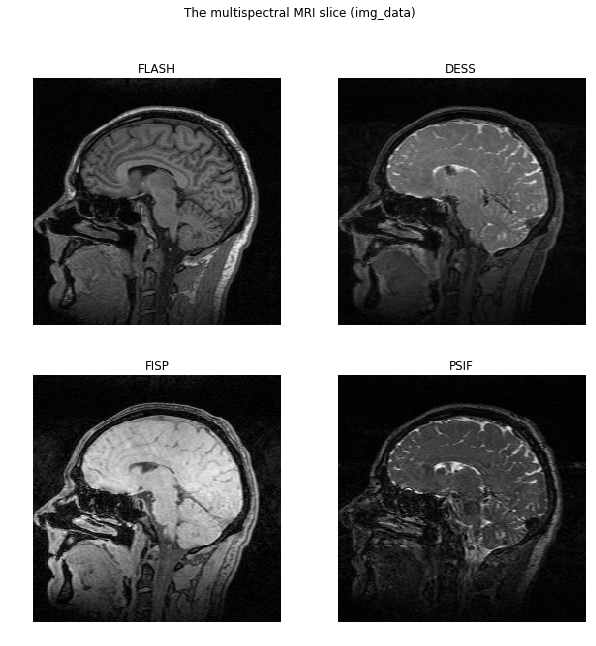

In [47]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
ax = axes.ravel()
for k, ch in enumerate(chn_names):
    ax[k].imshow(img_data[:, :, k].T, cmap='gray', origin='lower')
    ax[k].set_title(ch)
    ax[k].set(xlabel="")
    ax[k].axis('off')
plt.suptitle("The multispectral MRI slice (img_data)") 
plt.tight_layout
plt.show()

**Display training mask with color coding of tissue classes according to a color table (dictionary) being used during the training (manual labeling of tissue-specific pixels)**

In [48]:
import matplotlib
col_code = {
    'BCK': [255,255,255], # White (background)
    'AIR': [255,0,255],   # Magenta 
    'GM':  [255,0,0],     # Red 
    'WM':  [0,255,255],   # Cyan 
    'CSF': [0,0,255],     # Blue 
    'MUS': [0,255,0],     # Green 
    'FAT': [255,255,0]    # Yellow 
}
cla_names = list(col_code.keys())
ncla = len(cla_names)
colors = np.array(list(col_code.values()))/255   # scale to interval 0-1
mycmap = matplotlib.colors.ListedColormap(colors)
cla_cmap = matplotlib.cm.get_cmap(mycmap, ncla)   # ncla discrete colors

In [49]:
cla_names_num = []
for i in range(ncla):
    str = cla_names[i] + ' [%d]' % (i)
    cla_names_num.append(str)
cla_names_num

['BCK [0]', 'AIR [1]', 'GM [2]', 'WM [3]', 'CSF [4]', 'MUS [5]', 'FAT [6]']

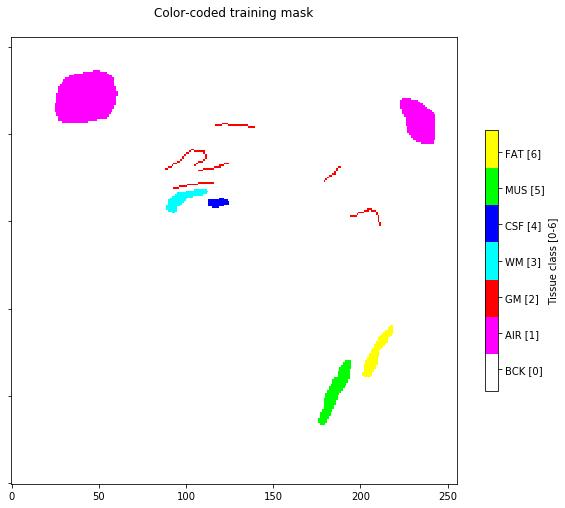

In [50]:
fig, ax = plt.subplots(figsize=(10,12))

cmsk = ax.imshow(tmsk_data[:, :].T)
clim=cmsk.properties()['clim']
cax = ax.imshow(tmsk_data[:, :].T, cmap=cla_cmap, origin='lower', clim=clim)
ax.set_title('Color-coded training mask\n')
ax.axis('on')
ax.set_yticklabels("")
#ax.set_xticklabels("")
cbar = fig.colorbar(cax, shrink=0.4, label='Tissue class [0-%d]' % clim[1]) 
tick_locs = np.linspace(clim[0]+0.5, clim[1]-0.5, ncla)
cbar.set_ticks(tick_locs)
cbar.ax.set_yticklabels(cla_names_num)
plt.tight_layout
plt.show()

#fig.savefig('%s/prj/ELMED219/results/training_mask_1_6_color_coded.png' % (home),
#            transparent=False, dpi=300, bbox_inches="tight")

## Constructing a Pandas data frame (FVB) from the MRI data (`img`) and the training mask  (`tmsk`)

FVB = feature vector base

In [51]:
# Find pixel locations corresponding to AIR (class 1), GM (class 2), ..., FAT (class 6)
frames = pd.DataFrame()   # Create an empty data frame
for cn, cla in enumerate(class_names):
    ind = np.where(tmsk_data == cn+1)  # Find indices (x,y) for given class, class numbers start at 1 (not 0)
    df = pd.DataFrame(np.asarray(img_data[ind[0][:],ind[1][:],:]), columns = chn_names)
    df.insert(len(df.columns), 'Class', class_names[cn].upper())  # Last entry is class name
    frames = frames.append(df)
FVB = pd.concat([frames], ignore_index=True)
print(FVB.head())
print(FVB.tail())
# Class-specific statistics of FVB accross the different features (channels)
#FVB.groupby('Class').describe(percentiles = [0.5]).round(3).T

   FLASH  DESS  FISP  PSIF Class
0      7     6    10     2   AIR
1      0     6     8     0   AIR
2      8     2     4    11   AIR
3      3     7     2    11   AIR
4      5     3     0     6   AIR
      FLASH  DESS  FISP  PSIF Class
1981    281    60   167   176   FAT
1982    305    58   167   164   FAT
1983    303    53   172   185   FAT
1984    281    65   145   176   FAT
1985    287    53   148   214   FAT


**Store to disk the FVB data frame as a .csv file**

In [52]:
FVB.to_csv('../data/mri/multispectral_mri_training_data_from_nifti_mask.csv', index=False)

## Supervised classification using the k-nearest neighbour (kNN) algorithm

See also https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/


### Training (labeled) data

**Read the stored FVB data frame with labelled training data**

In [53]:
FVB = pd.read_csv('../data/mri/multispectral_mri_training_data_from_nifti_mask.csv')
FVB.head()

FLASH  DESS  FISP  PSIF Class
0      7     6    10     2   AIR
1      0     6     8     0   AIR
2      8     2     4    11   AIR
3      3     7     2    11   AIR
4      5     3     0     6   AIR

**Extract the data matrix `X` (feature vectors are in float) and corresponding class labels `y` from our FVB data frame**

In [54]:
X_train = FVB.iloc[:, :-1].values.astype(float)
y_train = FVB.iloc[:, -1].values                 # Last column is 'Class'

### Test data included in the brain ROI mask

Read the mask with the delineated brain ROI

In [55]:
fn_roimsk = '../data/mri/brain_roi_mask.nii.gz'
roimsk = nib.load(fn_roimsk)
roimsk_data = roimsk.get_data().squeeze()
# roimsk_data = np.ones(roimsk_data.shape)   # Using the whole image as ROI

Find all pixel locations in the ROI for extracting test data **X_test** and combine test data and corresponding pixel locations to a Pandas data frame

In [56]:
# Find pixel locations corresponding to brain ROI (verdi 1) 
ind_test = np.where(roimsk_data == 1) 
X_test = np.asarray(img_data[ind_test[0][:],ind_test[1][:],:]) # The multispectral signal intensities
dfT = pd.DataFrame(X_test, columns = chn_names)
dfT.insert(loc = len(dfT.columns),
           column = 'row',
           value = ind_test[0])  # Row of pixel location
dfT.insert(loc = len(dfT.columns),
           column = 'col',
           value = ind_test[1])  # Col of pixel location

In [57]:
dfT.head()

FLASH  DESS  FISP  PSIF  row  col
0    149    66    67    66   20  121
1    129    90    86   106   20  122
2    101    83   146    81   20  123
3     28    79   158    40   20  124
4      7    53   155    67   20  125

In [58]:
dfT.tail()

FLASH  DESS  FISP  PSIF  row  col
35817     10    13    29     6  239  150
35818      8    18    29     6  239  151
35819     12    18    20     8  239  152
35820      0    20    25    16  239  153
35821      9    26    19    19  239  154

### Scaling* of feature vectors  (MRI signal inensity, channel-by-channel) in training and test data

*) Scaling to zero mean and unit standard deviation

In [59]:
scaler = StandardScaler()  
scaler.fit(X_train.astype(float))

X_train_scaled = scaler.transform(X_train.astype(float))  
X_test_scaled = scaler.transform(X_test.astype(float)) 

# Make data frame from pair of scaled X_train og y_train to check scaling
dX = pd.DataFrame(X_train_scaled, columns=chn_names)
dy = pd.DataFrame(y_train, columns=['Class'])
FVB_train = pd.concat([dX, dy], axis=1)
FVB_train.describe(percentiles = [0.5]).round(4).T

count  mean     std     min     50%     max
FLASH  1986.0   0.0  1.0003 -0.7119 -0.6019  3.4196
DESS   1986.0  -0.0  1.0003 -0.7713 -0.5691  5.0273
FISP   1986.0   0.0  1.0003 -0.8068 -0.6583  2.4738
PSIF   1986.0   0.0  1.0003 -0.6589 -0.5347  5.3990

### Design a k-nearest neighbour classifier  (KNN) for (unscaled) training data

In [60]:
K = 13
classifier = KNeighborsClassifier(n_neighbors=K)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

Prediction on the training dataset

In [61]:
y_train_pred = classifier.predict(X_train) 

Evaluation of the classification by calculating the **confusion matrix**<br>
(We are here testing the performance of the classifier on the same data as has been used for training - this is called _resubstitution evaluation_)

**Resubstitution estimates** are estimates that are derived by applying a model to the training data from which it was learned

In [62]:
print(confusion_matrix(y_train, y_train_pred))  
print(classification_report(y_train, y_train_pred)) 

[[1250    0    0    0    0    0]
 [   0   51    0    0    0    0]
 [   0    0  170    0    0    0]
 [   0    0    0  136    0    0]
 [   0    0    0    0  250    0]
 [   0    0    0    1    0  128]]
              precision    recall  f1-score   support

         AIR       1.00      1.00      1.00      1250
         CSF       1.00      1.00      1.00        51
         FAT       1.00      1.00      1.00       170
          GM       0.99      1.00      1.00       136
         MUS       1.00      1.00      1.00       250
          WM       1.00      0.99      1.00       129

   micro avg       1.00      1.00      1.00      1986
   macro avg       1.00      1.00      1.00      1986
weighted avg       1.00      1.00      1.00      1986



**Your turn!**

 - Experiment with different values of $K$ (e.g. $K=1, 5, 27, 51$) and check the confusion matrix on the training set.
 
 - Why is a diagonal confusion matrix guaranteed when setting $K=1$ ?

We will now set $K=5$, initially, and use scaled signal intensities (feature vectors)  - "zero mean unit variance" - across all classes  

In [63]:
K = 5
classifier = KNeighborsClassifier(n_neighbors=K)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### Prediction on brain ROI data (X_test)

In [64]:
y_pred = classifier.predict(X_test_scaled)

In [65]:
print('Number of classified pixels:', len(y_pred))
print('The first 10 predictions in ROI:', y_pred[:10])

Number of classified pixels: 35822
The first 10 predictions in ROI: ['MUS' 'MUS' 'MUS' 'MUS' 'MUS' 'MUS' 'CSF' 'CSF' 'AIR' 'AIR']


**Make a Pandas dataframe for the prediction  enabling remapping of tissue type labels to numerical values using a Python dictionary** 

In [67]:
df_y_pred = pd.DataFrame(y_pred,  columns=['Class'])
print(df_y_pred.info())
df_y_pred.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35822 entries, 0 to 35821
Data columns (total 1 columns):
Class    35822 non-null object
dtypes: object(1)
memory usage: 279.9+ KB
None


0    1    2    3    4
Class  MUS  MUS  MUS  MUS  MUS

In [68]:
df_y_pred.tail().T

35817 35818 35819 35820 35821
Class   AIR   AIR   AIR   AIR   AIR

**Designing a  dictionary that maps a textual tissue type label to a tissue type number**

In [69]:
cla_code = {
    'BCK': 0, # White (background)  Color-coding according to cla_cmap defined above
    'AIR': 1, # Magenta 
    'GM':  2, # Red 
    'WM':  3, # Cyan 
    'CSF': 4, # Blue 
    'MUS': 5, # Green 
    'FAT': 6  # Yellow 
}

df_y_pred['Class'] = df_y_pred['Class'].map(cla_code) # note: if the dictionary does not exhaustively map all
                                             # entries then non-matched entries are changed to NaNs

**Select the FLASH channel (T1w acquisition) to superimpose the pixel-wise tissue type prediction**

In [72]:
# Adding max classnumber + 1 to the FLASH data to avoid mixing data values with predicted class-numbers
cla_data = np.int16((img_data[:,:,0].copy().squeeze() + (df_y_pred.values.max() + 1)*np.ones(tmsk_data.shape)))
mx = cla_data.max()
mn = cla_data.min()
print('min - max =', mn, '-', mx)

cla_data = cla_data/mx
mx = cla_data.max().round(4)
mn = cla_data.min().round(4)
print('min - max =', mn, '-', mx)
cla_data.shape


min - max = 7 - 364
min - max = 0.0192 - 1.0


(256, 256)

Fill the `cla_data` with the pixel-wise KNN predictions (scaled to the interval [0, 1])

In [73]:
mx = df_y_pred['Class'].values.max()  # Max class value
cla_data[dfT['row'].values, dfT['col'].values] = df_y_pred['Class'].values / mx

### Inspect the prediction using color coding and grey-level coding of the tisue types (classes) 

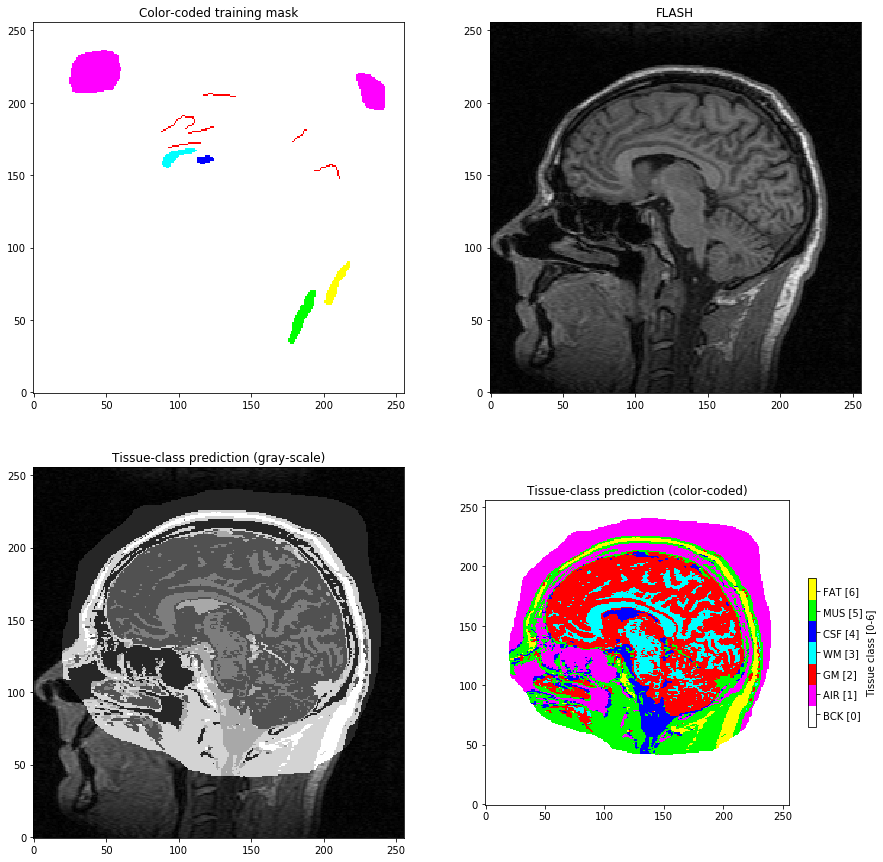

In [74]:
fig, axes = plt.subplots(2,2, figsize=(15,15))
ax = axes.ravel()

ax[0].imshow(tmsk_data[:, :].T, cmap=cla_cmap, origin='lower')
ax[0].set_title('Color-coded training mask')
ax[0].axis('on')

ax[1].imshow(img_data[:, :, 0].squeeze().T, cmap='gray', origin='lower')
ax[1].set_title('FLASH')

# Hadamar (elemnt-wise) product np.multiply(a,b)
ax[2].imshow(cla_data[:, :].T / mx, cmap='gray', origin='lower')
ax[2].set_title('Tissue-class prediction (gray-scale)')

ax[3].imshow(np.multiply(cla_data[:, :].T, roimsk_data[:, :].T) / mx, cmap=cla_cmap, origin='lower')
ax[3].set_title('Tissue-class prediction (color-coded)')

cbar = fig.colorbar(cax, shrink=0.4, label='Tissue class [0-%d]' % clim[1]) 
tick_locs = np.linspace(clim[0]+0.5, clim[1]-0.5, ncla)
cbar.set_ticks(tick_locs)
cbar.ax.set_yticklabels(cla_names_num)

plt.show()

fig.savefig('%s/prj/ELMED219/results/KNN_classification_results_on_flash.png' % (home),
           transparent=False, dpi=300, bbox_inches="tight")

### Experiments with a Random Forest classifier, where the labels are converted to numeric

In [75]:
df_y_train = pd.DataFrame(y_train,  columns=['Class'])
print(df_y_train.info())
df_y_train.head().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 1 columns):
Class    1986 non-null object
dtypes: object(1)
memory usage: 15.6+ KB
None


0    1    2    3    4
Class  AIR  AIR  AIR  AIR  AIR

In [76]:
df_y_train['Class'] = df_y_train['Class'].map(cla_code)
y_train_num = df_y_train['Class'].values

In [77]:
classifierRF = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

In [78]:
classifierRF.fit(X_train_scaled, y_train_num)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [79]:
y_pred_rf = classifierRF.predict(X_test_scaled)

Fyll data med de pixel-vise RF prediksjoner (skalert ned til intervallet [0, 1] )

In [80]:
mx = df_y_pred['Class'].values.max()  # Max class value
cla_data_rf = cla_data.copy()
cla_data_rf[dfT['row'].values, dfT['col'].values] = y_pred_rf / mx

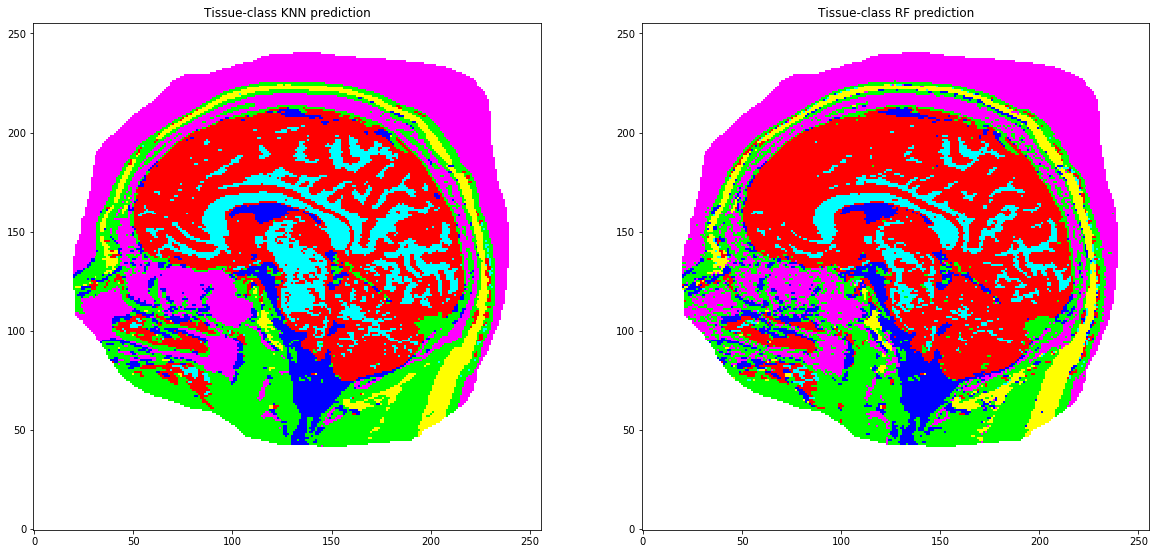

In [81]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
ax = axes.ravel()
ax[0].imshow(np.multiply(cla_data[:, :].T, roimsk_data[:, :].T) / mx, cmap=cla_cmap, origin='lower')
ax[0].set_title('Tissue-class KNN prediction')
ax[1].imshow(np.multiply(cla_data_rf[:, :].T, roimsk_data[:, :].T) / mx, cmap=cla_cmap, origin='lower')
ax[1].set_title('Tissue-class RF prediction')
plt.show()


### Evaluate the result: confusion matrix between KNN prediction (y_pred_knn) and RF prediction (y_pred_rf)

In [82]:
from utils import plot_confusion_matrix, plot_confusion_matrix_with_colorbar

In [83]:
y_pred_knn = df_y_pred['Class'].values

In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_knn, y_pred_rf)

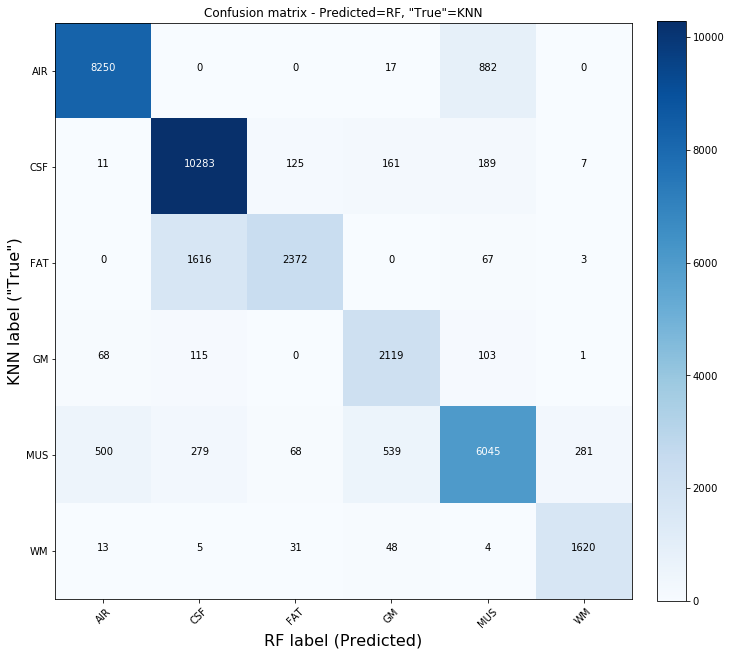

In [85]:
plot_confusion_matrix_with_colorbar(cm, classes=np.unique(y_pred), title='Confusion matrix - Predicted=RF, "True"=KNN', figsize=(10,10))
plt.ylabel('KNN label ("True")')
plt.xlabel('RF label (Predicted)')
plt.show()